In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
from datetime import date

In [2]:
def CAPM(ticker, start_date=None, end_date=None, market=None):
    """
    Parameters
    ----------
    ticker : str
        Single or multiple tickers selected from Yahoo Finance, separated by spaces.
    start_date : str, optional
        Start Date. The default is None, and if not provided, it defaults to '2021-01-01'.
    end_date : str, optional
        End Date. The default is None, and if not provided, it defaults to today's date.
    market : str, optional
        Market identifier. The default is "US". It can also be selected as "TR".

    Returns
    -------
    None
        Plots the Capital Asset Pricing Model (CAPM).
        Based on both the formula and linear regression.
    """
    
    ticker = ticker
    ticker = "".join(str(ticker).split(','))
    stocks = []
    stocks = [item for item in ticker.split()]
    if start_date == None:
        start_date = '2021-01-01'
    else:
        start_date = start_date
    if end_date == None:
        end_date = date.today()
    else:
        end_date = end_date
    def download_data():
        data = {}
        
        for stock in stocks:
            ticker = yf.download(stock, start_date, end_date)
            data[stock] = ticker["Adj Close"]
            
        return pd.DataFrame(data)
    
    def initialize():
        stock_data = download_data()
        stock_data = stock_data.resample("M").last()
        
        data = pd.DataFrame({'s_adjclose': stock_data[stocks[0]],
                                  'm_adjclose': stock_data[stocks[1]]})
        
        #logarithmic monthly returns
        data[['s_returns', "m_returns"]] = np.log(data[['s_adjclose', 'm_adjclose']] /
                                                       data[['s_adjclose', 'm_adjclose']].shift(1))
        
        data = data[1:]
        return data
    
    def calculate_beta():

        data = initialize()
        covariance_matrix = np.cov(data['s_returns'], data['m_returns'])
        #calculate beta based on the formula
        beta = covariance_matrix[0,1] / covariance_matrix[1,1]
        print("Beta from formula: ", beta)
    
    def regression():
        
        #using linear regression to fit a line to the data, where beta is our slope
        data = initialize()
        beta, alpha = np.polyfit(data['m_returns'], data['s_returns'], deg=1) #degree is one for linear line
        print("Beta from regression: ", beta)
        expected_return = RISK_FREE_RATE + beta * (data['m_returns'].mean() * MONTHS_IN_YEAR - RISK_FREE_RATE)
      
        print("Expected Return(Intercept): ", expected_return)
        plot_regression(data, alpha, beta)
    
    def plot_regression(data, alpha,beta):
        fig, axis = plt.subplots(1, figsize=(8,5))
        axis.scatter(data['m_returns'], data['s_returns'], label='Data Points')
        axis.plot(data['m_returns'], beta * data['m_returns'] + alpha, color='red', label="Security Market Line")
        plt.title("Capital Asset Pricing Model")
        plt.xlabel('Market return $R_m$', fontsize=14)
        plt.ylabel('Stock return $R_a$')
        plt.text(0.08, 0.05, r'$R_a = \beta * R_m + \alpha$', fontsize=12)
        plt.legend()
        plt.grid(True)
        plt.show()
        
    def get_risk_free_rate(start_date, end_date, market):
        if market == "US":
            tnx_data = yf.download("^TNX", start=start_date, end=end_date)
            avg_yield = tnx_data['Close'].mean() / 100
        elif market == "TR":
            avg_yield = pd.read_html("https://www.bloomberght.com/tahvil/tr-10-yillik-tahvil")[0]['%'][10] / 10000
            # This is used with most recent percentage like this because there's no free source to obtain data for "TR"
        else:
            raise ValueError("Invalid market identifier")
        return avg_yield
       
    
    RISK_FREE_RATE = get_risk_free_rate(start_date, end_date, market if market else "US")   
    MONTHS_IN_YEAR = 12
    calculate_beta()
    regression()   

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

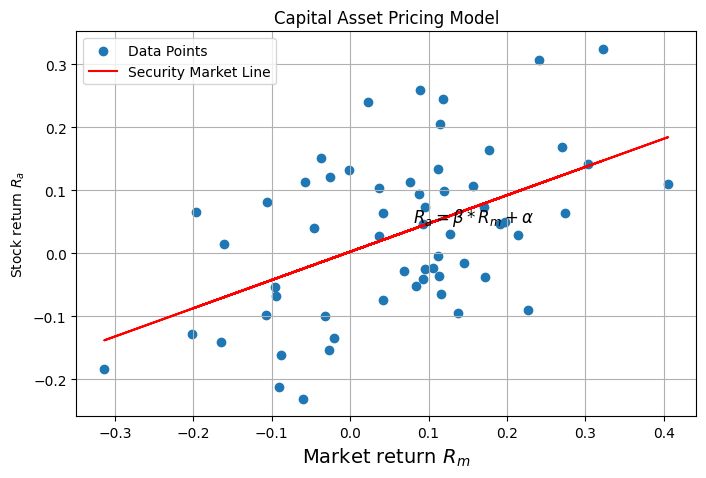

In [3]:
CAPM("AKBNK.IS, ALARK.IS, ARCLK.IS, ASELS.IS, BIMAS.IS, EKGYO.IS, ENKAI.IS, EREGL.IS, FROTO.IS, GARAN.IS, GUBRF.IS, HEKTS.IS, ISCTR.IS, KCHOL.IS, KONTR.IS, KOZAL.IS, KRDMD.IS, ODAS.IS, OYAKC.IS, PETKM.IS, PGSUS.IS, SAHOL.IS, SASA.IS, SISE.IS, TCELL.IS, THYAO.IS, TOASO.IS, TUPRS.IS, YKBNK.IS", "2019-01-01", "2024-01-01", market="TR")